In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder

In [4]:
sa_train = pd.read_csv("SalaryData_Train(1).csv")

In [5]:
sa_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
sa_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


# EDA

In [7]:
sa_train['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c6acbc216f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c6acbc21c30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c6acbc21450>],
 'medians': [<matplotlib.lines.Line2D at 0x7c6acbc22170>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c6acbc22410>],
 'means': []}

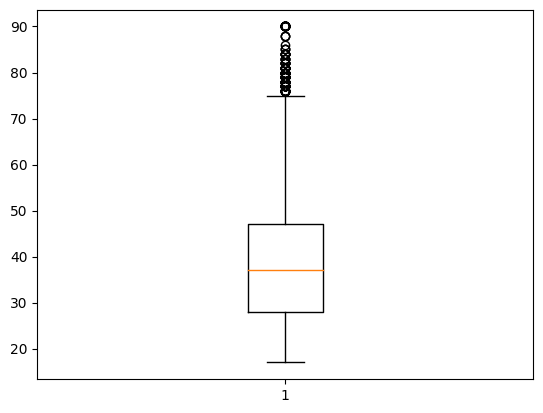

In [8]:
plt.boxplot(sa_train['age'])

In [9]:
sa_train['age'].describe()

count    30161.000000
mean        38.438115
std         13.134830
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

In [10]:
Age_IQR = 47 - 28
Age_Upper_limit = 47 + (1.5* Age_IQR)
Age_Upper_limit

75.5

In [11]:
sa_train[sa_train['age']>Age_Upper_limit].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 68 to 30071
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            169 non-null    int64 
 1   workclass      169 non-null    object
 2   education      169 non-null    object
 3   educationno    169 non-null    int64 
 4   maritalstatus  169 non-null    object
 5   occupation     169 non-null    object
 6   relationship   169 non-null    object
 7   race           169 non-null    object
 8   sex            169 non-null    object
 9   capitalgain    169 non-null    int64 
 10  capitalloss    169 non-null    int64 
 11  hoursperweek   169 non-null    int64 
 12  native         169 non-null    object
 13  Salary         169 non-null    object
dtypes: int64(5), object(9)
memory usage: 19.8+ KB


In [12]:
sa_train['age'].mean()

38.43811544710056

In [13]:
sa_train.loc[sa_train['age']>Age_Upper_limit, "age"] = sa_train['age'].mean()

In [14]:
sa_train[sa_train['age']>Age_Upper_limit]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary


{'whiskers': [<matplotlib.lines.Line2D at 0x7c6acbb4da20>,
 'caps': [<matplotlib.lines.Line2D at 0x7c6acbb4df60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c6acbb4d780>],
 'medians': [<matplotlib.lines.Line2D at 0x7c6acbb4e4a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c6acbb4e740>],
 'means': []}

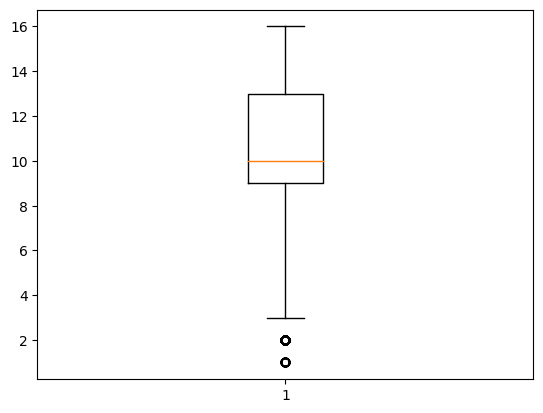

In [15]:
plt.boxplot(sa_train['educationno'])

In [16]:
sa_train['educationno'].describe()

count    30161.000000
mean        10.121316
std          2.550037
min          1.000000
25%          9.000000
50%         10.000000
75%         13.000000
max         16.000000
Name: educationno, dtype: float64

In [17]:
educationno_IQR = 13 - 9
educationno_Lower_limit = 9 - (1.5* educationno_IQR)
educationno_Lower_limit

3.0

In [18]:
sa_train[sa_train['educationno']<educationno_Lower_limit]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
208,53.0,Local-gov,Preschool,1,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,35,United-States,<=50K
386,52.0,Private,1st-4th,2,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K
428,50.0,Private,1st-4th,2,Married-spouse-absent,Craft-repair,Unmarried,White,Male,0,0,40,United-States,<=50K
493,57.0,Private,1st-4th,2,Widowed,Priv-house-serv,Not-in-family,Black,Female,0,0,30,United-States,<=50K
855,33.0,Private,1st-4th,2,Married-spouse-absent,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29927,24.0,Private,1st-4th,2,Married-civ-spouse,Handlers-cleaners,Other-relative,White,Male,0,0,40,Mexico,<=50K
29974,46.0,Private,Preschool,1,Married-civ-spouse,Machine-op-inspct,Other-relative,Black,Male,0,0,75,Dominican-Republic,<=50K
30018,48.0,Private,1st-4th,2,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Portugal,<=50K
30039,23.0,Private,1st-4th,2,Married-civ-spouse,Machine-op-inspct,Wife,Amer-Indian-Eskimo,Female,0,0,35,Mexico,<=50K


In [19]:
sa_train[sa_train['educationno']<educationno_Lower_limit].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 208 to 30045
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            196 non-null    float64
 1   workclass      196 non-null    object 
 2   education      196 non-null    object 
 3   educationno    196 non-null    int64  
 4   maritalstatus  196 non-null    object 
 5   occupation     196 non-null    object 
 6   relationship   196 non-null    object 
 7   race           196 non-null    object 
 8   sex            196 non-null    object 
 9   capitalgain    196 non-null    int64  
 10  capitalloss    196 non-null    int64  
 11  hoursperweek   196 non-null    int64  
 12  native         196 non-null    object 
 13  Salary         196 non-null    object 
dtypes: float64(1), int64(4), object(9)
memory usage: 23.0+ KB


In [20]:
sa_train['educationno'].mean()

10.121315606246478

In [21]:
sa_train.loc[sa_train['educationno']<educationno_Lower_limit, "educationno"] = sa_train['educationno'].mean()

In [22]:
sa_train[sa_train['educationno']<educationno_Lower_limit]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary


{'whiskers': [<matplotlib.lines.Line2D at 0x7c6acb9da890>,
 'caps': [<matplotlib.lines.Line2D at 0x7c6acb9dacb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c6acb9da5f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c6acb9db1f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c6acb9db490>],
 'means': []}

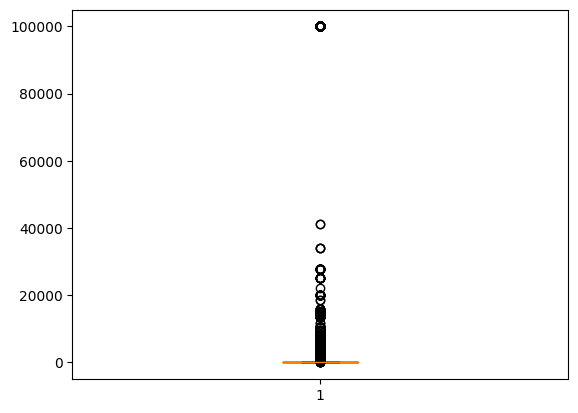

In [23]:
plt.boxplot(sa_train['capitalgain'])

In [24]:
sa_train['capitalgain'].describe()

count    30161.000000
mean      1092.044064
std       7406.466611
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capitalgain, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7c6ac9650be0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c6ac9651120>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c6ac9650a60>],
 'medians': [<matplotlib.lines.Line2D at 0x7c6ac9651660>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c6ac9651900>],
 'means': []}

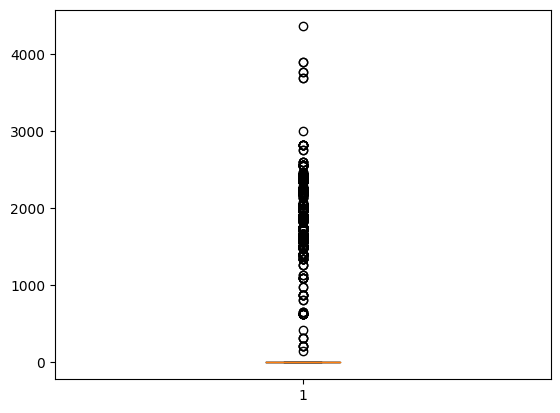

In [25]:
plt.boxplot(sa_train['capitalloss'])

In [26]:
sa_train['capitalloss'].describe()

count    30161.000000
mean        88.302311
std        404.121321
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capitalloss, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7c6ac969eda0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c6ac969f2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c6ac969eb00>],
 'medians': [<matplotlib.lines.Line2D at 0x7c6ac969f820>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c6ac969fac0>],
 'means': []}

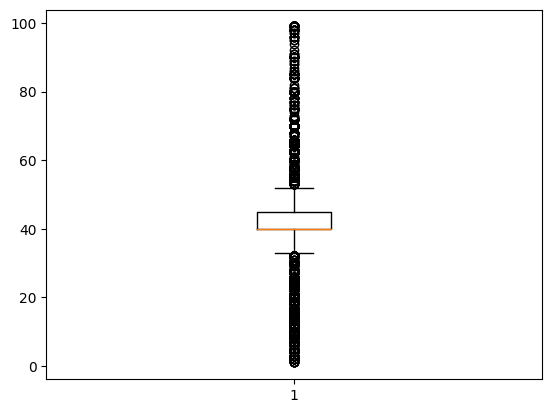

In [27]:
plt.boxplot(sa_train['hoursperweek'])

In [28]:
sa_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39.0,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50.0,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38.0,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53.0,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28.0,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


([<matplotlib.patches.Wedge at 0x7c6ac9711e40>,
 [Text(-0.7804258643717737, 0.775200277489353, ' <=50K'),
  Text(0.7804258280820289, -0.7752003140237236, ' >50K')])

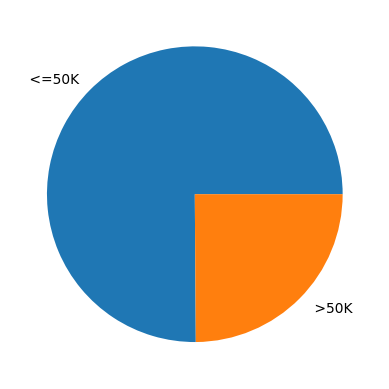

In [29]:
plt.pie(sa_train['Salary'].value_counts(), labels = sa_train['Salary'].unique())

# Label Encoder

In [30]:
le = LabelEncoder()

In [31]:
sa_train['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [32]:
sa_train['workclass'] = le.fit_transform(sa_train['workclass'])

In [33]:
sa_train['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [34]:
sa_train['education'] = le.fit_transform(sa_train['education'])

In [35]:
sa_train['maritalstatus'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [36]:
sa_train['maritalstatus'] = le.fit_transform(sa_train['maritalstatus'])

In [37]:
sa_train['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [38]:
sa_train['occupation'] = le.fit_transform(sa_train['occupation'])

In [39]:
sa_train['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [40]:
sa_train['relationship'] = le.fit_transform(sa_train['relationship'])

In [41]:
sa_train['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [42]:
sa_train['race'] = le.fit_transform(sa_train['race'])

In [43]:
sa_train['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [44]:
sa_train['sex'] = le.fit_transform(sa_train['sex'])

In [45]:
sa_train['native'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

In [46]:
sa_train['native'] = le.fit_transform(sa_train['native'])

In [47]:
sa_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39.0,5,9,13.0,4,0,1,4,1,2174,0,40,37,<=50K
1,50.0,4,9,13.0,2,3,0,4,1,0,0,13,37,<=50K
2,38.0,2,11,9.0,0,5,1,4,1,0,0,40,37,<=50K
3,53.0,2,1,7.0,2,5,0,2,1,0,0,40,37,<=50K
4,28.0,2,9,13.0,2,9,5,2,0,0,0,40,4,<=50K


In [48]:
sa_train['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [49]:
sa_train['Salary'] = le.fit_transform(sa_train['Salary'])

In [50]:
sa_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39.0,5,9,13.0,4,0,1,4,1,2174,0,40,37,0
1,50.0,4,9,13.0,2,3,0,4,1,0,0,13,37,0
2,38.0,2,11,9.0,0,5,1,4,1,0,0,40,37,0
3,53.0,2,1,7.0,2,5,0,2,1,0,0,40,37,0
4,28.0,2,9,13.0,2,9,5,2,0,0,0,40,4,0


# Train-Test Split

In [51]:
X = sa_train.iloc[:,0:13]
y = sa_train.iloc[:,13]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [53]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24128, 13), (6033, 13), (24128,), (6033,))

# Model 1

In [54]:
cvclf = SVC(C = 1, gamma = 2, kernel = 'rbf')

In [55]:
cvclf.fit(X_train, y_train)

SVC(C=1, gamma=2)

In [56]:
traincvclf_pred = cvclf.predict(X_train)

In [57]:
confusion_matrix(y_train, traincvclf_pred)

array([[18086,    77],
       [  445,  5520]])

In [58]:
print(classification_report(y_train, traincvclf_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     18163
           1       0.99      0.93      0.95      5965

    accuracy                           0.98     24128
   macro avg       0.98      0.96      0.97     24128
weighted avg       0.98      0.98      0.98     24128



In [59]:
fprcvclf, tprcvclf, threscvclf = roc_curve(y_train, traincvclf_pred)

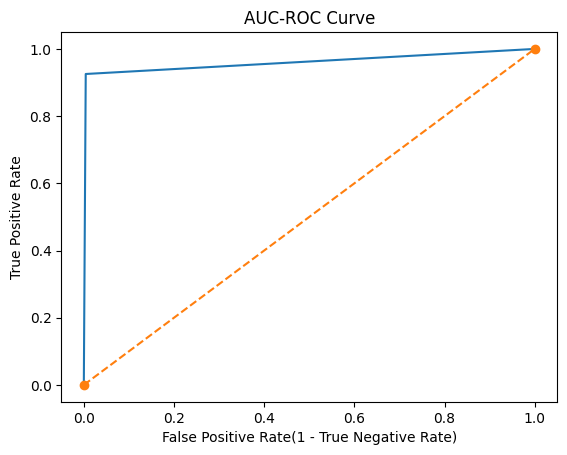

In [60]:
plt.plot(fprcvclf, tprcvclf)
plt.plot([0,1],[0,1], "o--")
plt.title("AUC-ROC Curve")
plt.xlabel("False Positive Rate(1 - True Negative Rate)")
plt.ylabel("True Positive Rate")
plt.show()

# Loading Testing data

In [61]:
sa_test = pd.read_csv("SalaryData_Test(1).csv")

In [62]:
sa_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [63]:
sa_test['workclass'].unique()

array([' Private', ' Local-gov', ' Self-emp-not-inc', ' Federal-gov',
       ' State-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [64]:
sa_test['workclass'] = le.fit_transform(sa_test['workclass'])

In [65]:
sa_test['education'].unique()

array([' 11th', ' HS-grad', ' Assoc-acdm', ' Some-college', ' 10th',
       ' Prof-school', ' 7th-8th', ' Bachelors', ' Masters', ' 5th-6th',
       ' Assoc-voc', ' 9th', ' Doctorate', ' 12th', ' 1st-4th',
       ' Preschool'], dtype=object)

In [66]:
sa_test['education'] = le.fit_transform(sa_test['education'])

In [67]:
sa_test['maritalstatus'].unique()

array([' Never-married', ' Married-civ-spouse', ' Widowed', ' Separated',
       ' Divorced', ' Married-spouse-absent', ' Married-AF-spouse'],
      dtype=object)

In [68]:
sa_test['maritalstatus'] = le.fit_transform(sa_test['maritalstatus'])

In [69]:
sa_test['occupation'].unique()

array([' Machine-op-inspct', ' Farming-fishing', ' Protective-serv',
       ' Other-service', ' Prof-specialty', ' Craft-repair',
       ' Adm-clerical', ' Exec-managerial', ' Tech-support', ' Sales',
       ' Priv-house-serv', ' Transport-moving', ' Handlers-cleaners',
       ' Armed-Forces'], dtype=object)

In [70]:
sa_test['occupation'] = le.fit_transform(sa_test['occupation'])

In [71]:
sa_test['relationship'].unique()

array([' Own-child', ' Husband', ' Not-in-family', ' Unmarried', ' Wife',
       ' Other-relative'], dtype=object)

In [72]:
sa_test['relationship'] = le.fit_transform(sa_test['relationship'])

In [73]:
sa_test['race'].unique()

array([' Black', ' White', ' Other', ' Amer-Indian-Eskimo',
       ' Asian-Pac-Islander'], dtype=object)

In [74]:
sa_test['race'] = le.fit_transform(sa_test['race'])

In [75]:
sa_test['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [76]:
sa_test['sex'] = le.fit_transform(sa_test['sex'])

In [77]:
sa_test['native'].unique()

array([' United-States', ' Peru', ' Guatemala', ' Mexico',
       ' Dominican-Republic', ' Ireland', ' Germany', ' Philippines',
       ' Thailand', ' Haiti', ' El-Salvador', ' Puerto-Rico', ' Vietnam',
       ' South', ' Columbia', ' Japan', ' India', ' Cambodia', ' Poland',
       ' Laos', ' England', ' Cuba', ' Taiwan', ' Italy', ' Canada',
       ' Portugal', ' China', ' Nicaragua', ' Honduras', ' Iran',
       ' Scotland', ' Jamaica', ' Ecuador', ' Yugoslavia', ' Hungary',
       ' Hong', ' Greece', ' Trinadad&Tobago',
       ' Outlying-US(Guam-USVI-etc)', ' France'], dtype=object)

In [78]:
sa_test['native'] = le.fit_transform(sa_test['native'])

In [79]:
sa_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K


In [80]:
sa_test['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [81]:
sa_test['Salary'] = le.fit_transform(sa_test['Salary'])

# Train-Test split for Testing data

In [82]:
X_test = sa_test.iloc[:,0:13]
y_test = sa_test.iloc[:,13]

# Metrics for Testing data

In [83]:
testcvclf_pred = cvclf.predict(X_test)

In [84]:
confusion_matrix(y_test, testcvclf_pred)

array([[11159,   201],
       [ 3412,   288]])

In [85]:
print(classification_report(y_test, testcvclf_pred))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86     11360
           1       0.59      0.08      0.14      3700

    accuracy                           0.76     15060
   macro avg       0.68      0.53      0.50     15060
weighted avg       0.72      0.76      0.68     15060



In [86]:
fprcvclf2, tprcvclf2, threscvclf2 = roc_curve(y_test, testcvclf_pred)

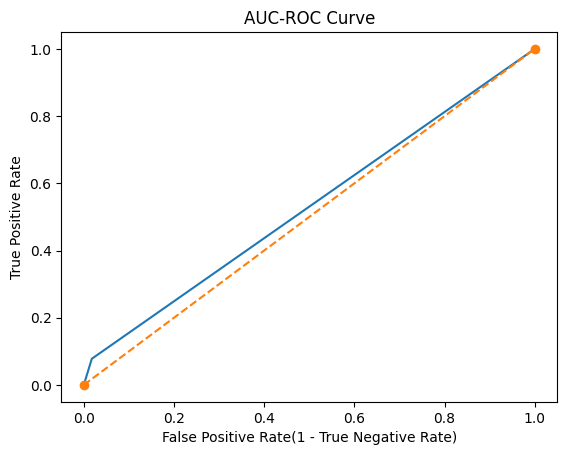

In [87]:
plt.plot(fprcvclf2, tprcvclf2)
plt.plot([0,1],[0,1], "o--")
plt.title("AUC-ROC Curve")
plt.xlabel("False Positive Rate(1 - True Negative Rate)")
plt.ylabel("True Positive Rate")
plt.show()

# Model 2

In [88]:
cvclf2 = SVC(C = 15, gamma = 0.001, kernel = 'rbf')

In [89]:
cvclf2.fit(X_train, y_train)

SVC(C=15, gamma=0.001)

In [90]:
testcvclf_pred2 = cvclf.predict(X_test)

In [91]:
confusion_matrix(y_test, testcvclf_pred2)

array([[11159,   201],
       [ 3412,   288]])

In [92]:
print(classification_report(y_test, testcvclf_pred2))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86     11360
           1       0.59      0.08      0.14      3700

    accuracy                           0.76     15060
   macro avg       0.68      0.53      0.50     15060
weighted avg       0.72      0.76      0.68     15060



In [93]:
fprcvclf3, tprcvclf3, threscvclf3 = roc_curve(y_test, testcvclf_pred2)

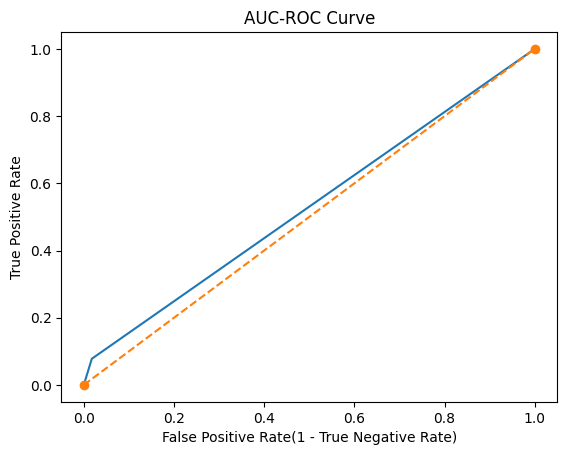

In [94]:
plt.plot(fprcvclf3, tprcvclf3)
plt.plot([0,1],[0,1], "o--")
plt.title("AUC-ROC Curve")
plt.xlabel("False Positive Rate(1 - True Negative Rate)")
plt.ylabel("True Positive Rate")
plt.show()